In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("raw/weather.csv")
df.head(20)

,weather_id,date_time,city,season,temperature_c,humidity,rain_mm,wind_speed_kmh,visibility_m,weather_condition,air_pressure_hpa
0,1.0,2099-13-40 25:61,London,Autumn,45.313069,134.0,21.036696,55.217543,4463.0,Rain,985.472382
1,2.0,2099-13-40 25:61,NaN,Summer,10.885474,68.0,21.329620,26.976646,2320.0,Rain,1025.228038
2,3.0,2099-13-40 25:61,NaN,NaN,-29.028858,74.0,16.679954,43.661836,8093.0,Storm,950.182779
3,4.0,2024-01-01T03:00Z,London,Winter,25.904207,97.0,23.534536,36.395418,4354.0,NaN,988.815058
4,5.0,01/01/2024 04AM,NaN,Summer,15.360175,91.0,146.850019,24.270452,4666.0,Rain,951.177326
5,6.0,NaN,London,Spring,32.773259,58.0,19.310183,28.154041,7576.0,Snow,1045.439530
6,7.0,Unknown,London,Autumn,26.514045,27.0,70.307299,2.844162,9433.0,Snow,967.181546
7,8.0,2024-01-01T07:00Z,NaN,Spring,17.661852,59.0,9.826941,78.793561,1508.0,Clear,1033.559398
8,9.0,2024-01-01 08:00,NaN,Winter,12.073337,50.0,26.247984,62.388994,2597.0,Snow,956.031503
9,10.0,2024-01-01T09:00Z,London,Winter,8.638003,18.0,110.950993,45.055543,6285.0,Fog,963.563889


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   weather_id         4898 non-null   float64
 1   date_time          4900 non-null   object 
 2   city               2501 non-null   object 
 3   season             3915 non-null   object 
 4   temperature_c      4897 non-null   float64
 5   humidity           4898 non-null   float64
 6   rain_mm            4899 non-null   float64
 7   wind_speed_kmh     4899 non-null   float64
 8   visibility_m       4900 non-null   float64
 9   weather_condition  4123 non-null   object 
 10  air_pressure_hpa   4898 non-null   float64
dtypes: float64(7), object(4)
memory usage: 434.1+ KB


In [4]:
df.duplicated().sum()

50

In [5]:
df = df.drop_duplicates().reset_index(drop=True)


In [6]:
df["weather_id"] = df["weather_id"].fillna(pd.Series(df.index + 1, index=df.index))

In [7]:
df["date_time"].unique()[:100]

array(['2099-13-40 25:61', '2024-01-01T03:00Z', '01/01/2024 04AM', nan,
       'Unknown', '2024-01-01T07:00Z', '2024-01-01 08:00',
       '2024-01-01T09:00Z', '2024-01-01 10:00', '01/01/2024 11AM',
       '2024-01-01 12:00', '2024-01-01 13:00', '01/01/2024 02PM',
       '01/01/2024 04PM', '2024-01-01T18:00Z', '2024-01-01T20:00Z',
       '01/01/2024 10PM', '01/01/2024 11PM', '2024-01-02T02:00Z',
       '2024-01-02T03:00Z', '02/01/2024 09AM', '2024-01-02 13:00',
       '2024-01-02T16:00Z', '02/01/2024 05PM', '2024-01-02T18:00Z',
       '2024-01-02T20:00Z', '2024-01-02 21:00', '02/01/2024 10PM',
       '2024-01-03T01:00Z', '03/01/2024 02AM', '2024-01-03 05:00',
       '2024-01-03T06:00Z', '2024-01-03T07:00Z', '2024-01-03T08:00Z',
       '2024-01-03T09:00Z', '03/01/2024 12PM', '2024-01-03 13:00',
       '2024-01-03T16:00Z', '2024-01-03 18:00', '03/01/2024 07PM',
       '2024-01-03T20:00Z', '2024-01-03 21:00', '2024-01-03 22:00',
       '2024-01-03 23:00', '2024-01-04 01:00', '04/01/2024 02

In [8]:
df.isnull().sum()

weather_id              0
date_time             150
city                 2523
season               1123
temperature_c         150
humidity              150
rain_mm               150
wind_speed_kmh        150
visibility_m          150
weather_condition     915
air_pressure_hpa      150
dtype: int64

In [9]:
df["date_time"] = df["date_time"].str.replace("Z", "", regex=False)

df["date_time"] = df["date_time"].str.replace(r"(?i)(AM|PM)", r" \1", regex=True)

df["date_time"] = df["date_time"].str.replace(r"\s+", " ", regex=True).str.strip()

df["date_time"] = pd.to_datetime(df["date_time"], errors="coerce", dayfirst=True)

C:\Users\Delta\AppData\Local\Temp\ipykernel_21180\881935382.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_time"] = pd.to_datetime(df["date_time"], errors="coerce", dayfirst=True)


In [10]:
df = df.dropna(subset=["date_time"]).reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   weather_id         2936 non-null   float64       
 1   date_time          2936 non-null   datetime64[ns]
 2   city               1468 non-null   object        
 3   season             2268 non-null   object        
 4   temperature_c      2849 non-null   float64       
 5   humidity           2844 non-null   float64       
 6   rain_mm            2853 non-null   float64       
 7   wind_speed_kmh     2835 non-null   float64       
 8   visibility_m       2852 non-null   float64       
 9   weather_condition  2401 non-null   object        
 10  air_pressure_hpa   2845 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 252.4+ KB


In [12]:
df["date_time"]

0      2024-01-01 03:00:00
1      2024-01-01 04:00:00
2      2024-01-01 07:00:00
3      2024-01-01 08:00:00
4      2024-01-01 09:00:00
               ...        
2931   2024-07-27 01:00:00
2932   2024-07-27 03:00:00
2933   2024-07-27 04:00:00
2934   2024-07-27 05:00:00
2935   2024-07-27 06:00:00
Name: date_time, Length: 2936, dtype: datetime64[ns]

In [13]:
df["city"].unique()

array(['London', nan], dtype=object)

In [14]:
df["city"] = df["city"].fillna("London")

In [15]:
df["season"].describe()

count       2268
unique         4
top       Autumn
freq         614
Name: season, dtype: object

In [16]:
df["season"] = df["season"].fillna("Autumn")

In [17]:
df.isnull().sum()

weather_id             0
date_time              0
city                   0
season                 0
temperature_c         87
humidity              92
rain_mm               83
wind_speed_kmh       101
visibility_m          84
weather_condition    535
air_pressure_hpa      91
dtype: int64

In [18]:
df["temperature_c"].describe()

count    2849.000000
mean       14.853150
std        13.648694
min       -29.999761
25%         8.720521
50%        15.128394
75%        20.794324
max        59.924538
Name: temperature_c, dtype: float64

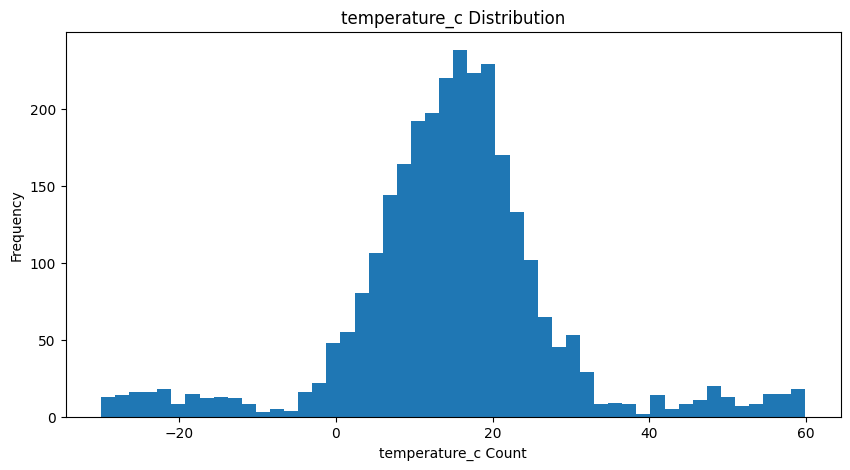

In [19]:
plt.figure(figsize=(10,5))
plt.hist(df["temperature_c"], bins=50)
plt.title("temperature_c Distribution")
plt.xlabel("temperature_c Count")
plt.ylabel("Frequency")
plt.show()

In [20]:
df = df[(df["temperature_c"] <= 40.2) & (df["temperature_c"] >= -15)].reset_index(drop=True)


In [21]:
df["temperature_c"] = df["temperature_c"].fillna(df["temperature_c"].median())


In [22]:
df.isnull().sum()


weather_id             0
date_time              0
city                   0
season                 0
temperature_c          0
humidity              82
rain_mm               72
wind_speed_kmh        91
visibility_m          75
weather_condition    478
air_pressure_hpa      80
dtype: int64

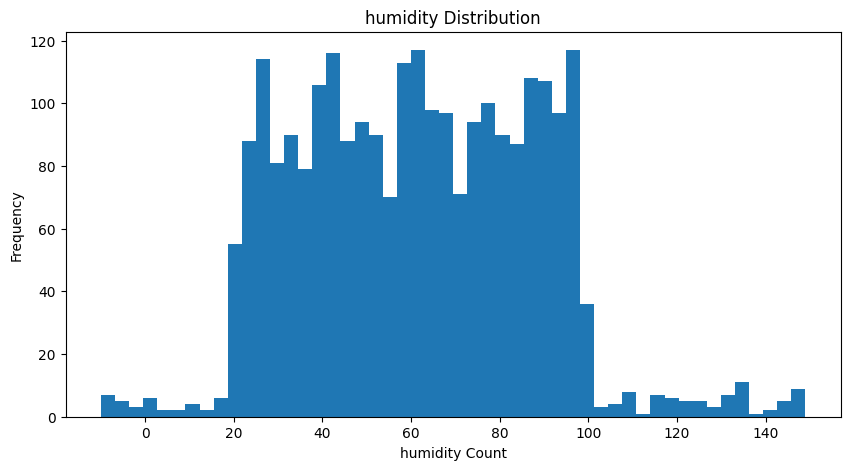

In [23]:
plt.figure(figsize=(10,5))
plt.hist(df["humidity"], bins=50)
plt.title("humidity Distribution")
plt.xlabel("humidity Count")
plt.ylabel("Frequency")
plt.show()

In [24]:
df["humidity"] = df["humidity"].clip(lower=0, upper=100)


In [25]:
df["humidity"] = df["humidity"].fillna(df["humidity"].median())


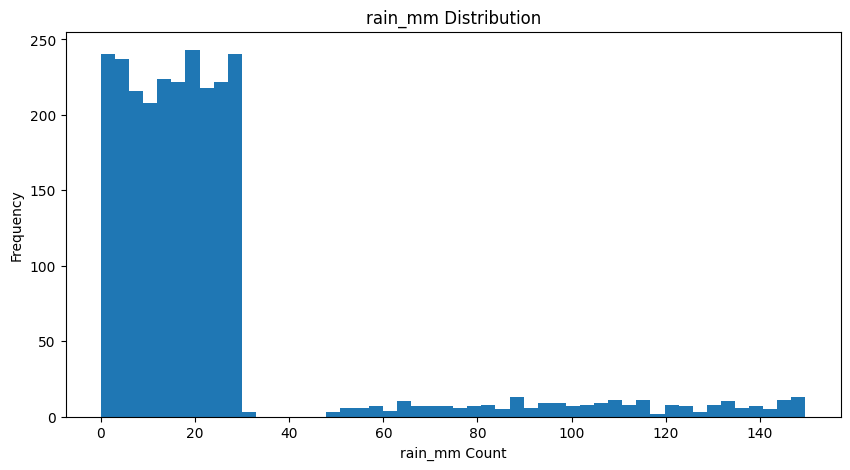

In [26]:
plt.figure(figsize=(10,5))
plt.hist(df["rain_mm"], bins=50)
plt.title("rain_mm Distribution")
plt.xlabel("rain_mm Count")
plt.ylabel("Frequency")
plt.show()

In [27]:
median_rain = df["rain_mm"].median()

df["rain_mm"] = df["rain_mm"].apply(lambda x: median_rain if x > 40 or x < 0 else x)


In [28]:
df["rain_mm"] = df["rain_mm"].fillna(df["rain_mm"].median())


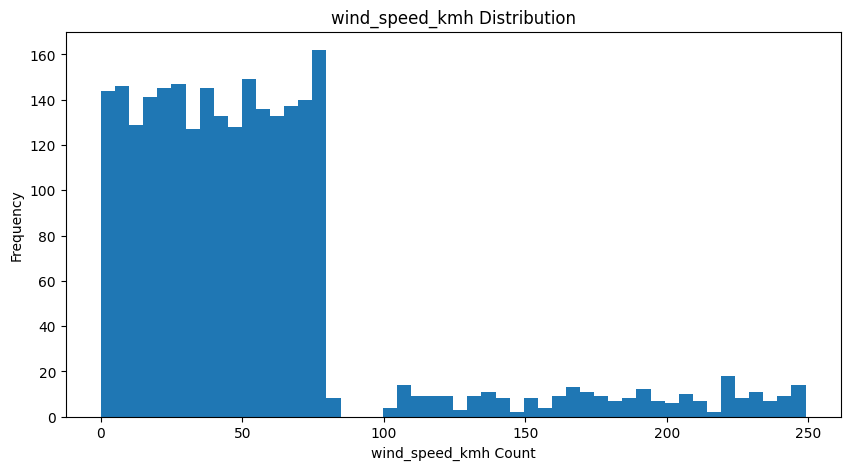

In [29]:
plt.figure(figsize=(10,5))
plt.hist(df["wind_speed_kmh"], bins=50)
plt.title("wind_speed_kmh Distribution")
plt.xlabel("wind_speed_kmh Count")
plt.ylabel("Frequency")
plt.show()

In [30]:
median_wind = df["wind_speed_kmh"].median()
df["wind_speed_kmh"] = df["wind_speed_kmh"].apply(lambda x: median_wind if  x > 100 else x)


In [31]:
df["wind_speed_kmh"] = df["wind_speed_kmh"].fillna(df["wind_speed_kmh"].median())

In [32]:
df["weather_condition"].describe()

count     2121
unique       5
top       Rain
freq       438
Name: weather_condition, dtype: object

In [33]:
df["weather_condition"] = df["weather_condition"].fillna("Rain")

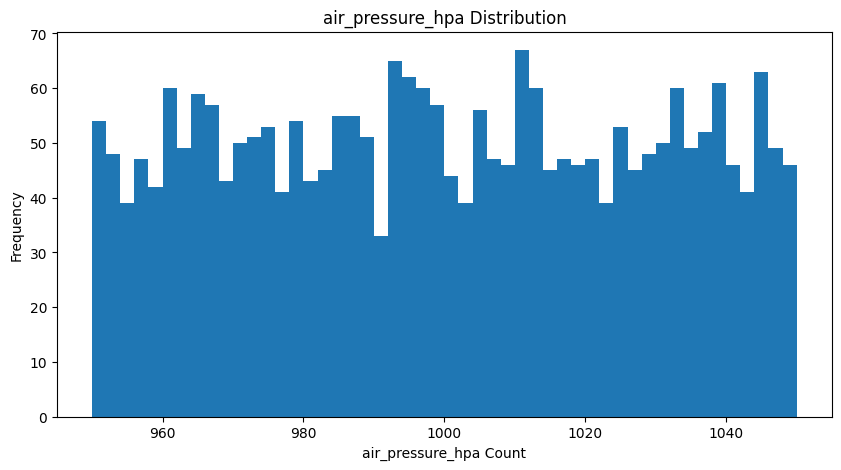

In [34]:
plt.figure(figsize=(10,5))
plt.hist(df["air_pressure_hpa"], bins=50)
plt.title("air_pressure_hpa Distribution")
plt.xlabel("air_pressure_hpa Count")
plt.ylabel("Frequency")
plt.show()

In [35]:
mode_air_pressure = df["air_pressure_hpa"].mode()[0]
df["air_pressure_hpa"] = df["air_pressure_hpa"].fillna(mode_air_pressure)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2599 entries, 0 to 2598
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   weather_id         2599 non-null   float64       
 1   date_time          2599 non-null   datetime64[ns]
 2   city               2599 non-null   object        
 3   season             2599 non-null   object        
 4   temperature_c      2599 non-null   float64       
 5   humidity           2599 non-null   float64       
 6   rain_mm            2599 non-null   float64       
 7   wind_speed_kmh     2599 non-null   float64       
 8   visibility_m       2524 non-null   float64       
 9   weather_condition  2599 non-null   object        
 10  air_pressure_hpa   2599 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 223.5+ KB


In [37]:
df["visibility_m"].describe()

count     2524.000000
mean      8299.298336
std      10217.917526
min         87.000000
25%       2663.500000
50%       5504.500000
75%       8413.000000
max      49956.000000
Name: visibility_m, dtype: float64

In [38]:
Q1 = df["visibility_m"].quantile(0.25)
Q3 = df["visibility_m"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
upper_bound


17037.25

In [39]:
median_vis = df["visibility_m"].median()

df["visibility_m"] = np.where(df["visibility_m"] > upper_bound,median_vis,df["visibility_m"])

df["visibility_m"] = df["visibility_m"].fillna(median_vis)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2599 entries, 0 to 2598
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   weather_id         2599 non-null   float64       
 1   date_time          2599 non-null   datetime64[ns]
 2   city               2599 non-null   object        
 3   season             2599 non-null   object        
 4   temperature_c      2599 non-null   float64       
 5   humidity           2599 non-null   float64       
 6   rain_mm            2599 non-null   float64       
 7   wind_speed_kmh     2599 non-null   float64       
 8   visibility_m       2599 non-null   float64       
 9   weather_condition  2599 non-null   object        
 10  air_pressure_hpa   2599 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 223.5+ KB


In [42]:
int_cols = ["weather_id",  "visibility_m"]
for col in int_cols:
    df[col] = df[col].astype("int64")

In [43]:
df.to_parquet("clean_data/weather_cleaned.parquet", index=False)
